In [42]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import SQLContext
from collections import Counter
import pandas as pd
%matplotlib inline

In [2]:
sc = SparkContext().getOrCreate()
sqlContext = SQLContext(sc)

In [3]:
df = sqlContext.read.json(
    'file:///mnt/d/tweets_1000.json')

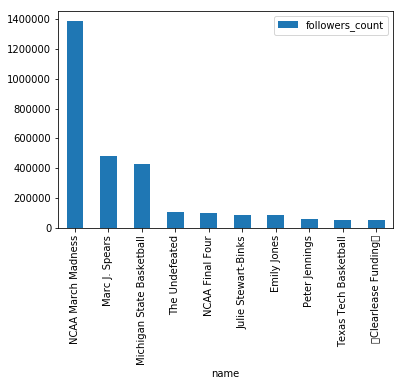

In [14]:
df.registerTempTable("tweets")
followers_count = sqlContext.sql("SELECT user.name, user.followers_count from tweets")
top_10_follow = followers_count.toPandas().sort_values(by=["followers_count"],ascending=False).head(10)
top_10_follow
top_10_follow.plot.bar(x = 'name')

In [18]:
#Locations with most tweets
#Follower counts by team
#Tweet count by team
#Positivity by fanbase
#Correlation between followers and retweet count

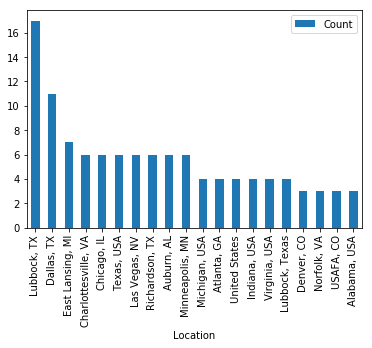

In [56]:
q = sqlContext.sql("SELECT user.location from tweets")
locations = []
for item in q.collect():
    if item[0] != None:
        locations.append(item[0])
count = Counter(locations)
top_ten = count.most_common(20)
pd_df = pd.DataFrame(top_ten, columns = ['Location', 'Count'])
pd_df.plot.bar(x = 'Location')

In [69]:
test = sqlContext.sql("SELECT entities.hashtags from tweets")
TTU = ['4to1', 'WreckEm', 'wreckem', 'TTU', 'ttu']
MSU = ['Spartans', 'spartans', 'GoGreen', 'gogreen', 'MSU', 'msu']
Auburn = ['WarEagle', 'wareagle', 'Auburn', 'auburn']
Virginia = ['UVA', 'uva', 'GoHoos', 'gohoos', 'Wahoowa', 'wahoowa']
team_count = {'TTU':0, 'MSU':0, 'Auburn':0, 'Virginia':0}
hashtags = []
for item in test.collect():
    if item[0] != None:
        for val in item[0]:
            if val[1] in TTU:
                team_count['TTU'] = team_count.get('TTU') + 1
            if val[1] in MSU:
                team_count['MSU'] = team_count.get('MSU') + 1
            if val[1] in Auburn:
                team_count['Auburn'] = team_count.get('Auburn') + 1
            if val[1] in Virginia:
                team_count['Virginia'] = team_count.get('Virginia') + 1
print(team_count)

{'TTU': 55, 'MSU': 49, 'Auburn': 50, 'Virginia': 23}
